In [2]:
import os
import path_file
os.chdir(os.path.dirname(os.path.dirname(path_file.__file__)))
os.getcwd()

'd:\\user\\Desktop\\Faculdade\\IC Rodolfo\\gasification 08-2023\\gasification'

In [3]:
import cantera as ct
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

import phases
import feedstock as fs
import fuel as fu
import gasifier as gs

For species Fe(c), discontinuity in cp/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 4.2881898

For species Fe(c), discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 3.425820683333331

For species Fe(c), discontinuity in s/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 8.486560101557188

For species Cr(cr), discontinuity in cp/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  749.1520512400002
	Value computed using high-temperature polynomial: 0.0

For species Cr(cr), discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  113.24055562733336
	Value computed using high-temperature polynomial: 0.0

For species Cr(cr), discontinuity in s/R detec

In [4]:
highvaleCoal = fs.create_fuel_stream(1, [57.2/91, 3.3/91, 16.2/91, 0.7/91, 0.2/91, 0], 13.4/91, 9/91, 21.1)
air3 = fs.create_air_stream(fs.convert_ER_air(highvaleCoal, 0.3))
air4 = fs.create_air_stream(fs.convert_ER_air(highvaleCoal, 0.4))
TT = np.linspace(600, 1600+1E-6, 1001)
results3 = []
results4 = []

In [5]:
# for i, T in enumerate(TT):
#     outlet3 = gs.gasify_isot(highvaleCoal, air3, T, 101325)
#     outlet4 = gs.gasify_isot(highvaleCoal, air4, T, 101325)
#     results3.append(outlet3)
#     results4.append(outlet4)

In [6]:
# fig1 = plt.figure(figsize=(6,6), dpi = 100)
# plt.semilogy(TT, [out.get_gas_fraction('H2O')*100 for out in results3], '-')
# plt.semilogy(TT, [out.get_gas_fraction('H2O')*100 for out in results4], '--')
# plt.semilogy(TT, [out.get_gas_fraction('CO2')*100 for out in results3], '-')
# plt.semilogy(TT, [out.get_gas_fraction('CO2')*100 for out in results4], '--')
# plt.semilogy(TT, [out.get_gas_fraction('H2')*100 for out in results3], '-')
# plt.semilogy(TT, [out.get_gas_fraction('H2')*100 for out in results4], '--')
# plt.semilogy(TT, [out.get_gas_fraction('CH4')*100 for out in results3], '-')
# plt.semilogy(TT, [out.get_gas_fraction('CH4')*100 for out in results4], '--')
# plt.semilogy(TT, [out.get_gas_fraction('N2')*100 for out in results3], '-')
# plt.semilogy(TT, [out.get_gas_fraction('N2')*100 for out in results4], '--')
# plt.semilogy(TT, [out.get_gas_fraction('CO')*100 for out in results3], '-')
# plt.semilogy(TT, [out.get_gas_fraction('CO')*100 for out in results4], '--')
# plt.grid()
# plt.xlim(600, 1600)
# plt.ylim(1E-4, 1E2)
# plt.show()

In [7]:
ultimate = [50.6, 6.5, 42, 0.2, 0, 0]
ash = 0.007
moistures = [0.185, 0.160, 0.147, 0.160, 0.152, 0.140, 0.147, 0.138, 0.125]
air = [2.03, 2.20, 2.37, 1.96, 2.12, 2.29, 1.86, 2.04, 2.36]
results = []

for i, moist in enumerate(moistures):
    fuel = fs.create_fuel_stream(1, ultimate, ash, moist)
    AFR = air[i]
    fuelMass = fuel.get_mass()
    airMass = AFR * fuelMass
    airStream = fs.create_air_stream(airMass)
    outlet = gs.gasify_isot(fuel, airStream, 950+273.15, 101325)
    results.append(outlet)

for i, out in enumerate(results):
    print(out.get_gas_fraction('N2')*100)

AttributeError: 'Stream' object has no attribute 'get_gas_fraction'

In [ ]:
fuel1 = fs.create_fuel_stream(1, ultimate, ash, 0.15)
air1 = fs.create_air_stream(fs.convert_ER_air(fuel1, 0.4))
TT = np.arange(800, 1400+1E-6, 20)
results = []
for i, t in enumerate(TT):
    outlet = gs.gasify_isot(fuel1, air1, t, 101325)
    results.append(outlet)

<function matplotlib.pyplot.show(close=None, block=None)>

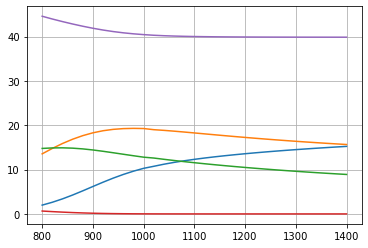

In [ ]:
plt.plot(TT, [out.get_gas_fraction('CO')*100 for out in results])
plt.plot(TT, [out.get_gas_fraction('H2')*100 for out in results])
plt.plot(TT, [out.get_gas_fraction('CO2')*100 for out in results])
plt.plot(TT, [out.get_gas_fraction('CH4')*100 for out in results])
plt.plot(TT, [out.get_gas_fraction('N2')*100 for out in results])
plt.grid()
plt.show

In [ ]:
sawdust = fs.create_fuel_stream(1, [50.9, 6.6, 40.5, 0.51, 0.34, 0], 0.0114, 0.15, 20.6)
ERs = np.arange(0, 1+1E-8, 0.01)
print(sawdust)
results = []
for i, ER in enumerate(ERs):
    airStream = fs.create_air_stream(fs.convert_ER_air(sawdust, ER))
    outlet = gs.gasify_isot(sawdust, airStream, 1100, 101325)
    results.append(outlet)

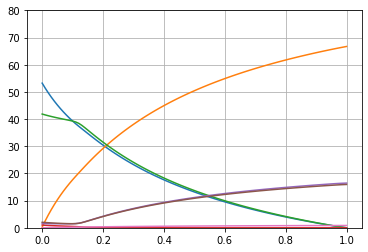

In [ ]:
plt.plot(ERs, [out.get_gas_fraction('H2')*100 for out in results])
plt.plot(ERs, [out.get_gas_fraction('N2')*100 for out in results])
plt.plot(ERs, [out.get_gas_fraction('CO')*100 for out in results])
plt.plot(ERs, [out.get_gas_fraction('CH4')*100 for out in results])
plt.plot(ERs, [out.get_gas_fraction('CO2')*100 for out in results])
plt.plot(ERs, [out.get_gas_fraction('H2O')*100 for out in results])
plt.plot(ERs, [out.get_gas_fraction('Ar')*100 for out in results])
plt.grid()
plt.ylim(0, 80)
plt.show()

In [ ]:
sawdust = fs.create_fuel_stream(1, [50.9, 6.6, 40.5, 0.51, 0.34, 0], 0.0114, 0.15, 20.6)
airStream = fs.create_air_stream(fs.convert_ER_air(sawdust, 0.2))
carbonConv = 0.8
directMethaneConv = 0.2
outlet = gs.gasify_isot(sawdust, airStream, T=1000, P=101325, carbonConv=carbonConv, directMethaneConv=directMethaneConv)
print('Expected char moles = ', sawdust.species_moles[phases.indices['C(gr)']] * (1-carbonConv))
print('Resulting char moles =', outlet.species_moles[phases.indices['C(gr)']])
print('Expected methane moles = ', sawdust.species_moles[phases.indices['C(gr)']] * directMethaneConv)
print('Resulting char moles =', outlet.species_moles[phases.indices['CH4']])

Expected char moles =  0.008476421482971242
Resulting char moles = 0.00848584088106436
Expected methane moles =  0.008476421482971244
Resulting char moles = 0.008484798709922003


In [ ]:
sawdust = fs.create_fuel_stream(1, [50.9, 6.6, 40.5, 0.51, 0.34, 0], 0.0114, 0.15, 20.6)
ERs = np.arange(0, 1+1E-8, 0.01)
results = []
for i, ER in enumerate(ERs):
    airStream = fs.create_air_stream(fs.convert_ER_air(sawdust, ER))
    carbonConv = 0.25 + 0.75*np.exp(-ER/0.23)
    directMethaneConv = 0.11*(1 - ER)
    outlet = gs.gasify_isot(sawdust, airStream, T=1100, P=101325, carbonConv=carbonConv, directMethaneConv=directMethaneConv)
    results.append(outlet)

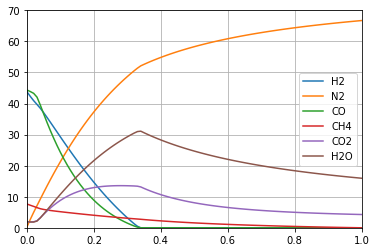

In [ ]:
plt.plot(ERs, [out.get_gas_fraction('H2')*100 for out in results], label='H2')
plt.plot(ERs, [out.get_gas_fraction('N2')*100 for out in results], label='N2')
plt.plot(ERs, [out.get_gas_fraction('CO')*100 for out in results], label='CO')
plt.plot(ERs, [out.get_gas_fraction('CH4')*100 for out in results], label='CH4')
plt.plot(ERs, [out.get_gas_fraction('CO2')*100 for out in results], label='CO2')
plt.plot(ERs, [out.get_gas_fraction('H2O')*100 for out in results], label='H2O')
plt.grid()
plt.legend()
plt.ylim(0, 70)
plt.xlim(0, 1)
plt.show()

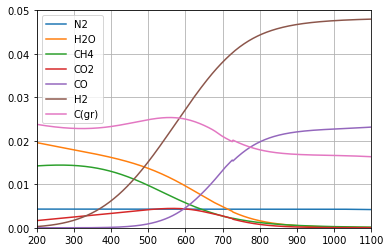

In [ ]:
ultimateDAF = [50.61, 8.79, 25.46, 12.80, 1.89, 0.46]
ashWB = 0.051
moistWB = 0.124
ashDB = ashWB / (1 - moistWB)
moistDB = moistWB / (1 - moistWB)
leather = fs.create_fuel_stream(1, ultimateDAF, ashDB, moistDB, 18.448, 16.729, 
                                [23.58, 1.20, 7.35, 2.59, 1.08, 0.79, 0, 1.59, 1.53, 0, 55.91])
emptyAir = fs.create_air_stream(fs.convert_ER_air(leather, 0))
outlet = gs.gasify_isot(leather, emptyAir, 200+273.15)
TT = np.arange(200+273.15, 1100+273.15+1E-6, 2)
results = []
for i, t in enumerate(TT):
    outlet = gs.gasify_isot(leather, emptyAir, t)
    results.append(outlet)

plt.plot(TT-273.15, [out.species_moles[phases.indices['N2']] for out in results], label='N2')
plt.plot(TT-273.15, [out.species_moles[phases.indices['H2O']] for out in results], label='H2O')
plt.plot(TT-273.15, [out.species_moles[phases.indices['CH4']] for out in results], label='CH4')
plt.plot(TT-273.15, [out.species_moles[phases.indices['CO2']] for out in results], label='CO2')
plt.plot(TT-273.15, [out.species_moles[phases.indices['CO']] for out in results], label='CO')
plt.plot(TT-273.15, [out.species_moles[phases.indices['H2']] for out in results], label='H2')
plt.plot(TT-273.15, [out.species_moles[phases.indices['C(gr)']] for out in results], label='C(gr)')
plt.xlim(200, 1100)
plt.ylim(0, 0.05)
plt.legend()
plt.grid()
plt.show()

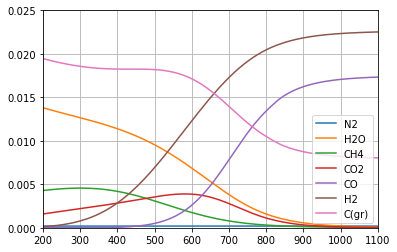

In [ ]:
ultimateDAF = [59.3, 6.16, 29.63, 1.08, 3.82, 0.01]
ashWB = 0.431
moistWB = 0.111
ashDB = ashWB / (1 - moistWB)
moistDB = moistWB / (1 - moistWB)
coal = fs.create_fuel_stream(1, ultimateDAF, ashDB, moistDB, 13.386, 12.686, 
                                [29.54, 1.02, 9.02, 4.21, 0.16, 0.70, 0.41, 0.03, 0.36, 0, 0])
emptyAir = fs.create_air_stream(fs.convert_ER_air(coal, 0))
outlet = gs.gasify_isot(coal, emptyAir, 200+273.15)
TT = np.arange(200+273.15, 1100+273.15+1E-6, 2)
results = []
for i, t in enumerate(TT):
    outlet = gs.gasify_isot(coal, emptyAir, t)
    results.append(outlet)

plt.plot(TT-273.15, [out.species_moles[phases.indices['N2']] for out in results], label='N2')
plt.plot(TT-273.15, [out.species_moles[phases.indices['H2O']] for out in results], label='H2O')
plt.plot(TT-273.15, [out.species_moles[phases.indices['CH4']] for out in results], label='CH4')
plt.plot(TT-273.15, [out.species_moles[phases.indices['CO2']] for out in results], label='CO2')
plt.plot(TT-273.15, [out.species_moles[phases.indices['CO']] for out in results], label='CO')
plt.plot(TT-273.15, [out.species_moles[phases.indices['H2']] for out in results], label='H2')
plt.plot(TT-273.15, [out.species_moles[phases.indices['C(gr)']] for out in results], label='C(gr)')
plt.xlim(200, 1100)
plt.ylim(0, 0.025)
plt.legend()
plt.grid()
plt.show()